In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_cust=pd.read_csv("customers.csv")
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married


In [4]:
df_cs=pd.read_csv("credit_profiles.csv")
df_trans=pd.read_csv("transactions.csv")

In [5]:
df_cs.tail()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
999,996,564,0.702963,688.0,2.0,1250.0
1000,997,774,0.465462,17139.0,0.0,60000.0
1001,998,529,0.585856,386.0,3.0,1000.0
1002,999,725,0.249670,6973.0,2.0,40000.0
1003,1000,775,0.696050,33956.0,1.0,60000.0


In [6]:
df_trans.tail()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
499995,499996,791,2023-09-05,43,Amazon,Books,Phonepe
499996,499997,569,2023-09-05,53022,Meesho,Fashion & Apparel,Net Banking
499997,499998,57,2023-09-05,224,NaN,Garden & Outdoor,Phonepe
499998,499999,629,2023-09-05,538,Flipkart,Home Decor,Gpay
499999,500000,392,2023-09-05,346,Amazon,Kitchen Appliances,Net Banking


In [7]:
df_trans.shape

(500000, 7)

In [23]:
import mysql.connector as sh

In [24]:
conn=sh.connect(
    host='localhost',
    user='root',
    passwd='root',
    database='e_master_card'
)

In [51]:
df_cust=pd.read_sql("select * from customers",conn)
df_cust.iloc[14]

C:\Users\shikh\AppData\Local\Temp\ipykernel_21204\2294298994.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_cust=pd.read_sql("select * from customers",conn)


cust_id                      15
name              Sanjana Malik
gender                   Female
age                          25
location                  Rural
occupation               Artist
annual_income                 0
marital_status          Married
Name: 14, dtype: object

In [37]:
df_tract=pd.read_sql("select * from transactions",conn)
df_tract.head()

C:\Users\shikh\AppData\Local\Temp\ipykernel_21204\119182573.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_tract=pd.read_sql("select * from transactions",conn)


,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [28]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,132439.799000
std,288.819436,15.666155,113706.313793
min,1.000000,1.000000,0.000000
25%,250.750000,26.000000,42229.750000
50%,500.500000,32.000000,107275.000000
75%,750.250000,46.000000,189687.500000
max,1000.000000,135.000000,449346.000000


In [53]:
df_cust[df_cust['annual_income'].isnull()]
print(df_cust['annual_income'].is_zero().sum())


AttributeError: 'Series' object has no attribute 'is_zero'

In [42]:
df_cust[df_cust.occupation=="Freelancer"].annual_income.median()

45189.5

In [57]:
df_cust.annual_income.replace(0,"null")

0      358211
1       65172
2       22378
3       33563
4       39406
        ...  
995      null
996    290061
997    139141
998      null
999    226873
Name: annual_income, Length: 1000, dtype: object

In [60]:
df_cust.iloc[14]

cust_id                      15
name              Sanjana Malik
gender                   Female
age                          25
location                  Rural
occupation               Artist
annual_income               NaN
marital_status          Married
Name: 14, dtype: object

In [59]:
import numpy as np

df_cust['annual_income'] = df_cust['annual_income'].replace(0, np.nan)

In [63]:
df_cust[df_cust.annual_income.isnull()]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,NaN,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,NaN,Single
97,98,Virat Puri,Male,47,Suburb,Business Owner,NaN,Married
102,103,Aarav Shah,Male,32,City,Data Scientist,NaN,Married
155,156,Kiaan Saxena,Male,24,City,Fullstack Developer,NaN,Married
170,171,Advait Verma,Male,52,City,Business Owner,NaN,Single
186,187,Samar Sardar,Male,53,City,Consultant,NaN,Single
192,193,Ishan Joshi,Male,37,Suburb,Data Scientist,NaN,Married
227,228,Advait Mukherjee,Male,48,City,Business Owner,NaN,Married
232,233,Aditya Goel,Male,26,City,Freelancer,NaN,Married


In [72]:
median_occ=df_cust.groupby('occupation').annual_income.median()
median_occ['Artist']

45794.0

In [77]:
df_cust["annual_income"]=df_cust.apply(lambda row:median_occ[row['occupation']] if pd.isnull(row['annual_income']) else row['annual_income'],axis=1)

In [79]:
df_cust.iloc[14]

cust_id                      15
name              Sanjana Malik
gender                   Female
age                          25
location                  Rural
occupation               Artist
annual_income           45794.0
marital_status          Married
Name: 14, dtype: object

C:\Users\shikh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


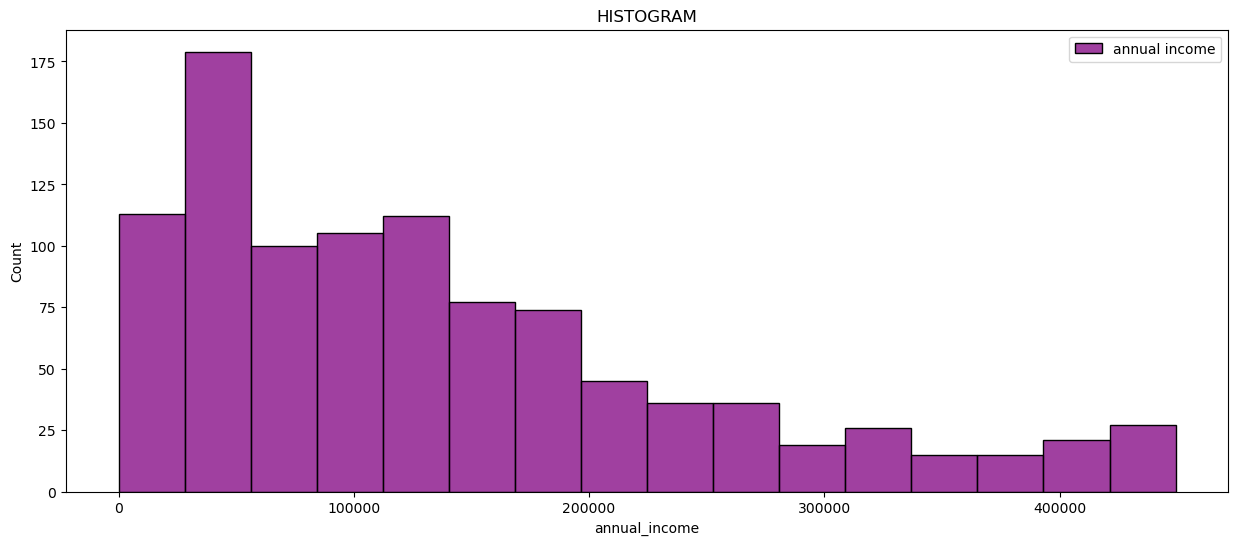

In [92]:
plt.figure(figsize=(15,6))
sns.histplot(df_cust["annual_income"],color='purple',label="annual income")
plt.title("HISTOGRAM")
plt.legend()

In [97]:
median_occ.values

array([ 65265. ,  45794. , 261191.5,  58017. , 135759. ,  46759. ,
        76774. ])

median_occ.Index

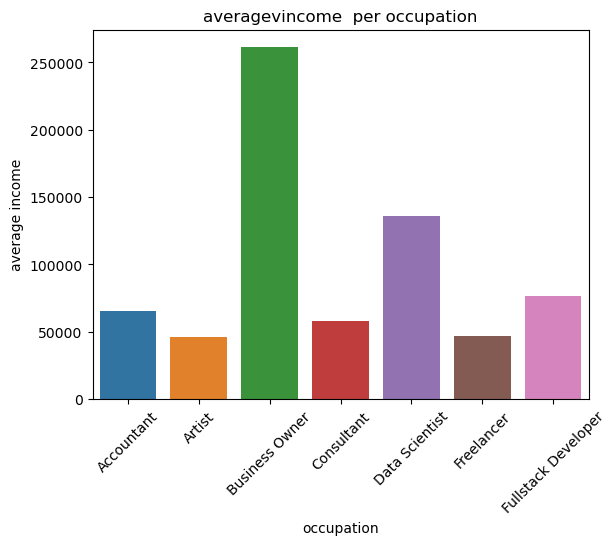

In [118]:

sns.barplot(x=median_occ.index, y=median_occ.values)
plt.xticks(rotation=45)
plt.ylabel('average income')
plt.title('averagevincome  per occupation')
plt.show()

In [124]:
columns=['gender','location','occupation','marital_status']

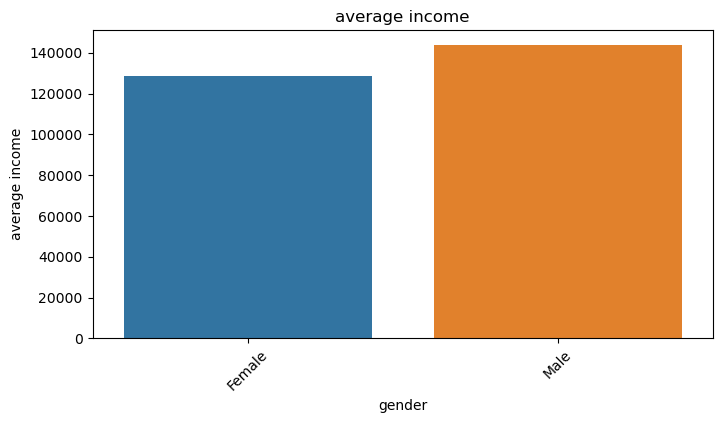

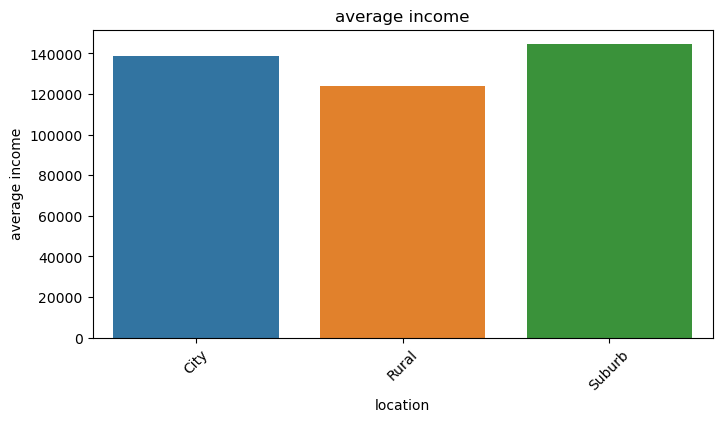

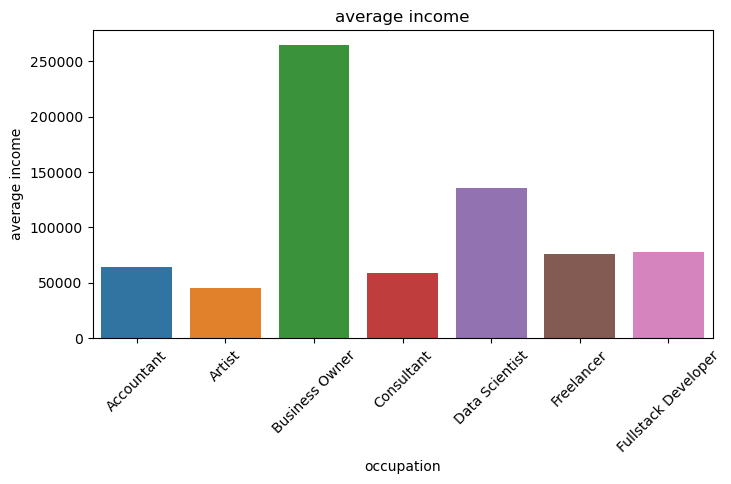

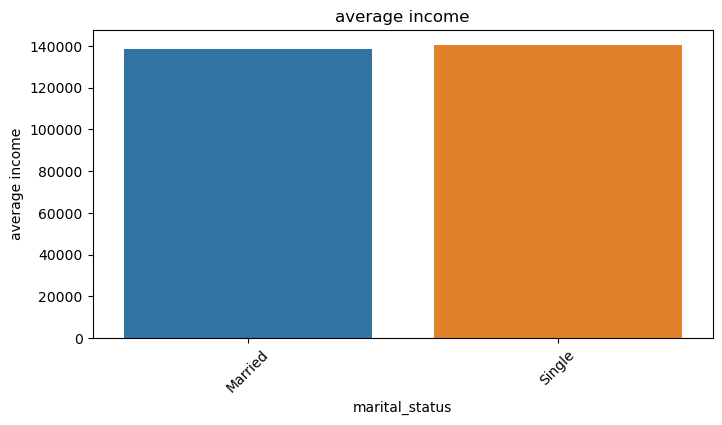

In [126]:
for col in columns:
    plt.figure(figsize=(8,4))
    mean_income=df_cust.groupby(col)['annual_income'].mean()
    sns.barplot(x=mean_income.index, y=mean_income.values)
    plt.xticks(rotation=45)
    plt.ylabel('average income')
    plt.title('average income')
    plt.show()

In [138]:
m_female=df_cust[df_cust.gender=="Female"].age.median()

In [127]:
df_cust["age"].describe()

count    1000.000000
mean       36.405000
std        15.666155
min         1.000000
25%        26.000000
50%        32.000000
75%        46.000000
max       135.000000
Name: age, dtype: float64

In [129]:
df_cust[(df_cust.age<15) | (df_cust.age>80)]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
41,42,Aaryan Shah,Male,110,City,Artist,7621.0,Married
165,166,Sia Dutta,Female,1,City,Freelancer,39721.0,Single
174,175,Rohan Sharma,Male,110,City,Freelancer,23723.0,Married
222,223,Arjun Batra,Male,110,Suburb,Freelancer,210987.0,Married
277,278,Aarav Tandon,Male,110,City,Consultant,96522.0,Single
295,296,Ayush Pandey,Male,1,Rural,Accountant,55254.0,Married
325,326,Virat Goel,Male,110,City,Accountant,61021.0,Single
610,611,Rehan Verma,Male,135,Rural,Business Owner,444776.0,Married
692,693,Dhruv Jha,Male,1,City,Business Owner,83045.0,Married


In [139]:
df_cust['age']=df_cust.age.replace((df_cust.age<15),m_female)

ValueError: Series.replace cannot use dict-like to_replace and non-None value

In [141]:
df_cust.loc[df_cust['age'] < 15, 'age'] = m_female


In [145]:
df_cust[(df_cust.age<15) | (df_cust.age>80)]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [150]:
m_male=df_cust[df_cust.gender=="Male"].age.median()
m_male

33.0

In [155]:
outliers=df_cust[df_cust.age>80]
for index in outliers:
       df_cust.at[index, 'age'] = m_male

In [156]:
df_cust["age"].describe()

count    1008.000000
mean       35.499008
std        12.142402
min        18.000000
25%        26.000000
50%        32.000000
75%        44.000000
max        64.000000
Name: age, dtype: float64

In [147]:
df_cust.loc[df_cust['age']]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
32,33,Aahan Gupta,Male,32,City,Data Scientist,160219.0,Married
47,48,Vivaan Duggal,Male,32,City,Business Owner,117263.0,Married
21,22,Arnav Goswami,Male,59,City,Business Owner,435536.0,Married
24,25,Arnav Pandey,Male,29,City,Fullstack Developer,109158.0,Single
48,49,Yuvraj Thakur,Male,47,Suburb,Business Owner,248414.0,Married
...,...,...,...,...,...,...,...,...
26,27,Avani Das,Female,64,City,Business Owner,360483.0,Married
55,56,Krishna Pandey,Male,24,City,Freelancer,55244.0,Married
29,30,Aditya Kulkarni,Male,31,Rural,Data Scientist,105583.0,Married
47,48,Vivaan Duggal,Male,32,City,Business Owner,117263.0,Married


In [157]:
bins=[17,25,48,65]
labels=['18-25','26-48','49-65']
df_cust['age_group']=pd.cut(df_cust['age'],bins=bins,labels=labels)

In [158]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1.0,Manya Acharya,Female,32.0,City,Business Owner,358211.0,Married,26-48
1,2.0,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3.0,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4.0,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5.0,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48


In [173]:
age_grp_count=df_cust.age_group.value_counts(normalize=True)*100
age_grp_count


age_group
26-48    58.035714
18-25    23.809524
49-65    18.154762
Name: proportion, dtype: float64

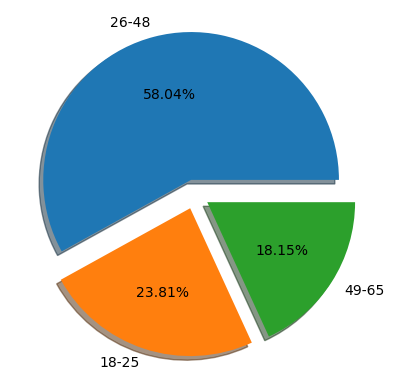

In [177]:
plt.pie(x=age_grp_count,labels=age_grp_count.index,autopct='%1.2f%%',shadow=True,explode=(0.1,0.1,0.1))
plt.show()

In [192]:
x=df_cust.groupby('location').gender.value_counts().unstack()
x

gender,Female,Male
location,,
City,226,457
Rural,26,59
Suburb,74,158


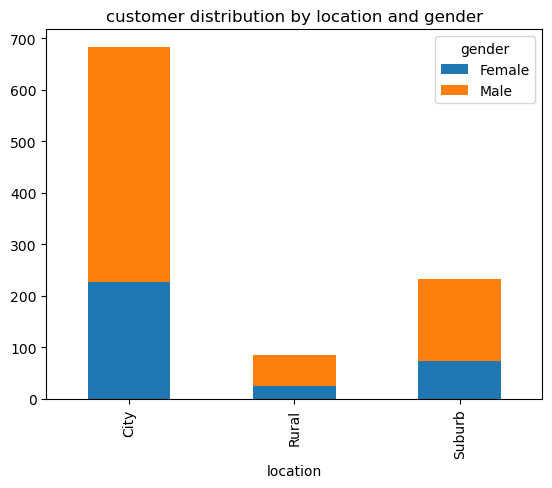

In [190]:
x.plot(kind="bar",stacked=True)
plt.title("customer distribution by location and gender")
plt.show()

In [193]:
df_cs.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [196]:
df_cs.cust_id.nunique()

1000

In [207]:
df_cs.shape

(1004, 6)

In [208]:
df_cs[df_cs.duplicated(subset="cust_id",keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
516,517,308,NaN,NaN,NaN,NaN
517,517,308,0.113860,33.0,3.0,500.0
569,569,344,NaN,NaN,NaN,NaN
570,569,344,0.112599,37.0,0.0,500.0
607,606,734,NaN,NaN,NaN,NaN
608,606,734,0.193418,4392.0,1.0,40000.0
664,662,442,NaN,NaN,NaN,NaN
665,662,442,0.856039,266.0,2.0,500.0


In [210]:
df_ncs=df_cs.drop_duplicates(subset="cust_id",keep="last")

In [211]:
df_ncs[df_ncs.duplicated(subset="cust_id",keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit


In [214]:
df_ncs.isnull().sum()

cust_id                            0
credit_score                       0
credit_utilisation                 0
outstanding_debt                   0
credit_inquiries_last_6_months     0
credit_limit                      65
dtype: int64

In [220]:
df_ncs[df_ncs.credit_limit.isnull()].shape

(65, 6)

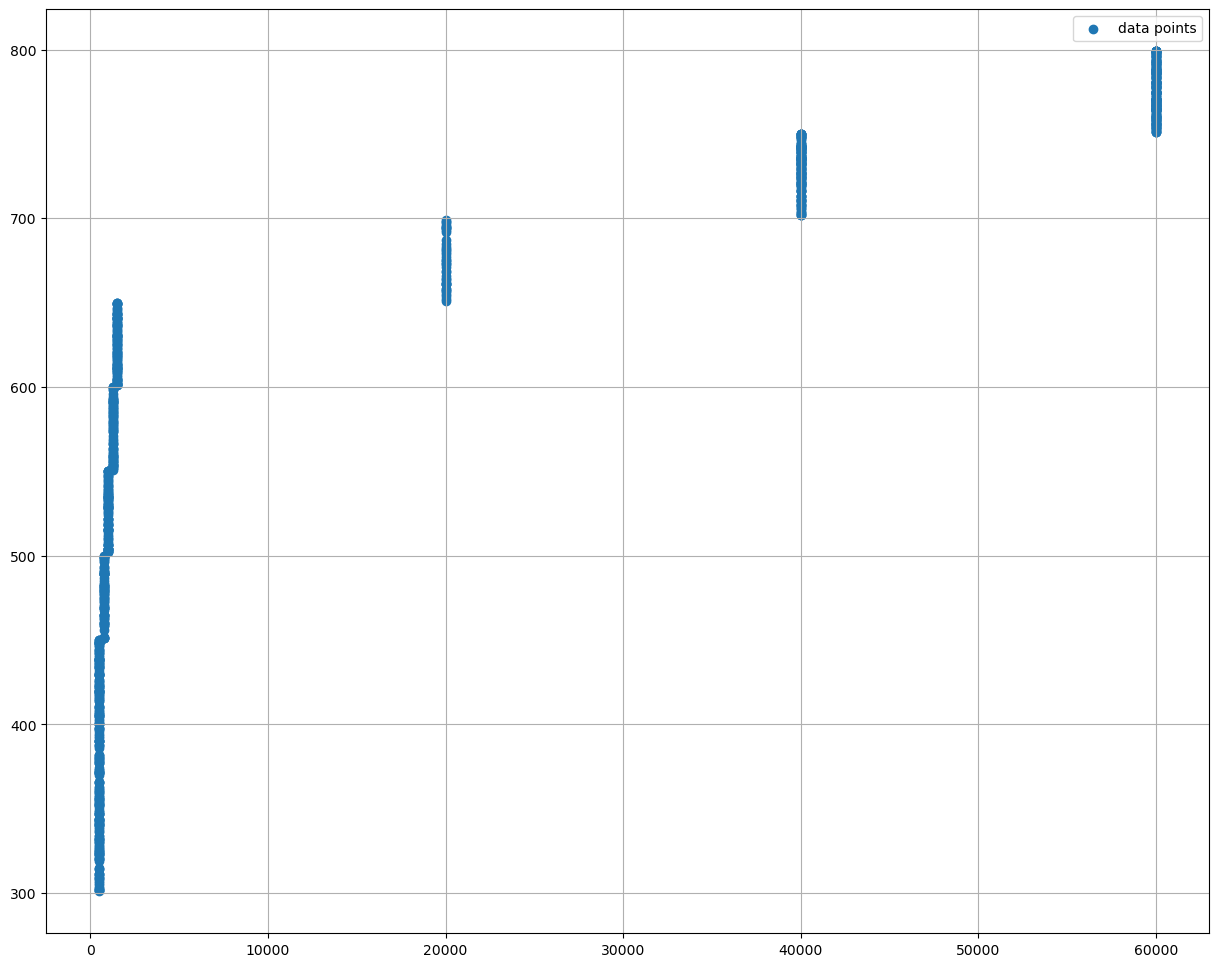

In [239]:
plt.figure(figsize=(15,12))
plt.scatter(x=df_ncs["credit_limit"],y=df_ncs["credit_score"],marker="o",label="data points")
plt.grid()
plt.legend()

In [274]:
bins_x=[299,450,500,550,600,650,700,750,800]
labels_x=['300-449','450-499','500-549','550-599','600-649','650-699','700-749','750-799']
df_ncs["credit_s_range"]=pd.cut(df_ncs["credit_score"],bins=bins_x,labels=labels_x)
df_ncs.head()

C:\Users\shikh\AppData\Local\Temp\ipykernel_21204\484338461.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ncs["credit_s_range"]=pd.cut(df_ncs["credit_score"],bins=bins_x,labels=labels_x)


,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_s_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
1,2,587,0.107928,161644.0,2.0,1250.0,550-599
2,3,544,0.854807,513.0,4.0,1000.0,500-549
3,4,504,0.336938,224.0,2.0,1000.0,500-549
4,5,708,0.586151,18090.0,2.0,40000.0,700-749


In [290]:
df_ncs.loc[680]

cust_id                                677
credit_score                           300
credit_utilisation                0.785509
outstanding_debt                     341.0
credit_inquiries_last_6_months         1.0
credit_limit                         500.0
credit_s_range                     300-449
Name: 680, dtype: object

In [255]:
df_ncs.credit_s_range.value_counts()

credit_s_range
300-449    239
750-799    207
700-749    148
600-649    105
500-549     97
450-499     82
550-599     78
650-699     43
Name: count, dtype: int64

In [281]:
credit_range=df_ncs.groupby("credit_s_range").credit_limit.median()
credit_range

C:\Users\shikh\AppData\Local\Temp\ipykernel_21204\3672412212.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  credit_range=df_ncs.groupby("credit_s_range").credit_limit.median()


credit_s_range
300-449      500.0
450-499      750.0
500-549     1000.0
550-599     1250.0
600-649     1500.0
650-699    20000.0
700-749    40000.0
750-799    60000.0
Name: credit_limit, dtype: float64

In [276]:
df_ncs[df_ncs.credit_s_range.isnull()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_s_range


In [277]:
credit_range[df_ncs["credit_s_range"]]

credit_s_range
700-749    40000.0
550-599     1250.0
500-549     1000.0
500-549     1000.0
700-749    40000.0
            ...   
550-599     1250.0
750-799    60000.0
500-549     1000.0
700-749    40000.0
750-799    60000.0
Name: credit_limit, Length: 1000, dtype: float64

In [308]:
df_ncs['credit_limit'] = df_ncs.apply(
    lambda row: credit_range.get(row['credit_s_range']) if pd.isnull(row['credit_limit']) else row['credit_limit'],
    axis=1
)


C:\Users\shikh\AppData\Local\Temp\ipykernel_21204\1867445346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ncs['credit_limit'] = df_ncs.apply(


In [309]:
df_cs_new=df_ncs.copy()

In [310]:
na=df_cs_new[df_ncs.credit_limit.isnull()]
na.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_s_range


In [305]:
df_ncs.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,589.182000,0.498950,25534.670000,1.955000,19733.500000
std,288.819436,152.284929,0.233139,29927.066648,1.414559,24717.629112
min,1.000000,300.000000,0.103761,500.000000,0.000000,500.000000
25%,250.750000,460.000000,0.293917,2484.250000,1.000000,750.000000
50%,500.500000,601.500000,0.487422,18438.000000,2.000000,1500.000000
75%,750.250000,738.000000,0.697829,40000.000000,3.000000,40000.000000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.000000


<Axes: xlabel='outstanding_debt'>

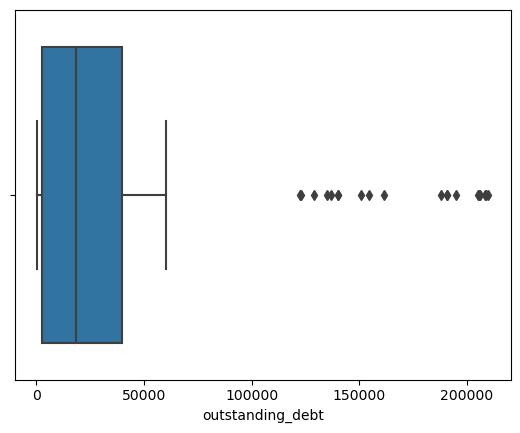

In [311]:
sns.boxplot(x=df_cs_new["outstanding_debt"])

In [313]:
y=df_cs_new[df_ncs.outstanding_debt>df_ncs.credit_limit]
y

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_s_range
1,2,587,0.107928,161644.0,2.0,1250.0,550-599
2,3,544,0.854807,40000.0,4.0,1000.0,500-549
3,4,504,0.336938,1500.0,2.0,1000.0,500-549
5,6,442,0.705409,1250.0,4.0,500.0,300-449
7,8,482,0.121775,40000.0,2.0,750.0,450-499
...,...,...,...,...,...,...,...
995,992,555,0.801781,60000.0,3.0,1250.0,550-599
997,994,602,0.605931,40000.0,3.0,1500.0,600-649
998,995,360,0.594345,20000.0,0.0,500.0,300-449
999,996,564,0.702963,60000.0,2.0,1250.0,550-599


C:\Users\shikh\AppData\Local\Temp\ipykernel_21204\168520756.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ncs["outstanding_debt"]=df_ncs.outstanding_debt.replace(df_ncs["credit_limit"])


In [302]:
df_ncs[df_ncs.outstanding_debt>df_ncs.credit_limit]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_s_range
1,2,587,0.107928,161644.0,2.0,1250.0,550-599
2,3,544,0.854807,40000.0,4.0,1000.0,500-549
3,4,504,0.336938,1500.0,2.0,1000.0,500-549
5,6,442,0.705409,1250.0,4.0,500.0,300-449
7,8,482,0.121775,40000.0,2.0,750.0,450-499
...,...,...,...,...,...,...,...
995,992,555,0.801781,60000.0,3.0,1250.0,550-599
997,994,602,0.605931,40000.0,3.0,1500.0,600-649
998,995,360,0.594345,20000.0,0.0,500.0,300-449
999,996,564,0.702963,60000.0,2.0,1250.0,550-599


In [299]:
df_ncs.shape

(1000, 7)

In [314]:
df_ncs.loc[df_ncs.outstanding_debt>df_ncs.credit_limit,"outstanding_debt"]=df_ncs["credit_limit"]

In [315]:
df_ncs[df_ncs.outstanding_debt>df_ncs.credit_limit]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_s_range


In [316]:
df_ncs.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,589.182000,0.498950,7134.657000,1.955000,19733.500000
std,288.819436,152.284929,0.233139,10513.040479,1.414559,24717.629112
min,1.000000,300.000000,0.103761,500.000000,0.000000,500.000000
25%,250.750000,460.000000,0.293917,500.000000,1.000000,750.000000
50%,500.500000,601.500000,0.487422,1250.000000,2.000000,1500.000000
75%,750.250000,738.000000,0.697829,10924.500000,3.000000,40000.000000
max,1000.000000,799.000000,0.899648,60000.000000,4.000000,60000.000000


In [317]:
df_ncs[["credit_limit","credit_score"]].corr()

,credit_limit,credit_score
credit_limit,1.000000,0.847951
credit_score,0.847951,1.000000


In [320]:
df_mer=df_cust.merge(df_ncs,on="cust_id",how="inner")
df_mer.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_s_range
0,1.0,Manya Acharya,Female,32.0,City,Business Owner,358211.0,Married,26-48,749,0.585171,19571.0,0.0,40000.0,700-749
1,2.0,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48,587,0.107928,1250.0,2.0,1250.0,550-599
2,3.0,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25,544,0.854807,1000.0,4.0,1000.0,500-549
3,4.0,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25,504,0.336938,1000.0,2.0,1000.0,500-549
4,5.0,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48,708,0.586151,18090.0,2.0,40000.0,700-749


In [323]:
corr_matrix=df_mer[["credit_limit","credit_score","age","annual_income","credit_utilisation","outstanding_debt"]].corr()

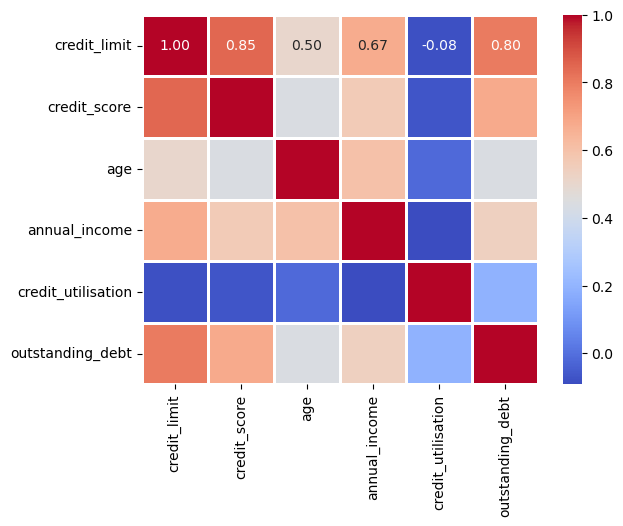

In [326]:
sns.heatmap(corr_matrix,annot=True,fmt=".2f",cmap="coolwarm",linewidth=0.8)
plt.show()

In [327]:
df_trans.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [328]:
df_trans.isnull().sum()

tran_id                0
cust_id                0
tran_date              0
tran_amount            0
platform            4941
product_category       0
payment_type           0
dtype: int64

In [330]:
df_trans.groupby("platform")["cust_id"].value_counts()

platform  cust_id
Alibaba   827        110
          617        103
          988        102
          520        102
          680        100
                    ... 
Shopify   580         24
          267         24
          114         23
          624         23
          361         20
Name: count, Length: 7000, dtype: int64

In [332]:
df_trans[df_trans.platform.isna()]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
355,356,58,2023-01-01,237,NaN,Electronics,Net Banking
418,419,383,2023-01-01,338,NaN,Electronics,Credit Card
607,608,421,2023-01-01,700,NaN,Electronics,Phonepe
844,845,945,2023-01-01,493,NaN,Sports,Credit Card
912,913,384,2023-01-01,85,NaN,Fashion & Apparel,Phonepe
...,...,...,...,...,...,...,...
499579,499580,924,2023-09-05,31,NaN,Fashion & Apparel,Gpay
499646,499647,944,2023-09-05,58445,NaN,Fashion & Apparel,Phonepe
499725,499726,620,2023-09-05,15,NaN,Sports,Net Banking
499833,499834,616,2023-09-05,97,NaN,Fashion & Apparel,Credit Card


In [349]:
p=df_trans.groupby(["product_category","platform"]).size().unstack()
p

platform,Alibaba,Amazon,Cred,Ebay,Flipkart,Meesho,Shopify
product_category,,,,,,,
Beauty & Personal Care,8475,16581,2784,1152,14013,8013,4475
Books,2041,4054,648,268,3300,2048,1155
Electronics,19207,43486,6511,2580,31982,19243,10229
Fashion & Apparel,17173,34752,5808,2375,29140,17232,9253
Garden & Outdoor,3511,7012,1189,475,5900,3506,1809
Home Decor,5796,11092,1920,751,9500,5750,3141
Kitchen Appliances,8603,16749,2913,1150,14191,8534,4649
Sports,7346,14761,2508,999,12234,7424,3948
Toys & Games,1432,2956,460,194,2400,1521,757


<Axes: xlabel='count', ylabel='product_category'>

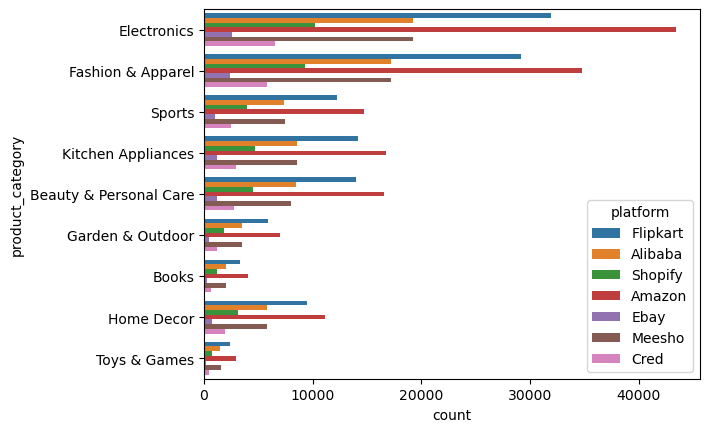

In [356]:
sns.countplot(y=df_trans["product_category"],hue=df_trans["platform"])

In [370]:
df_trans.platform.fillna("Amazon",inplace=True)

In [371]:
x=df_trans.platform.mode()

In [372]:
df_trans[df_trans.platform.isna()]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type


In [373]:
df_trans.isnull().sum()

tran_id             0
cust_id             0
tran_date           0
tran_amount         0
platform            0
product_category    0
payment_type        0
dtype: int64

In [374]:
df_trans.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711634,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


In [381]:
df_trans[(df_trans.tran_amount==0)][['product_category','platform','payment_type']].value_counts()

product_category  platform  payment_type
Electronics       Amazon    Credit Card     4734
Name: count, dtype: int64

In [384]:
trans_med=df_trans[(df_trans.product_category=="Electronics")& (df_trans.platform=="Amazon")& (df_trans.payment_type=="Credit Card")].tran_amount.median()
trans_med

326.0

In [386]:
df_trans.loc[df_trans.tran_amount==0,'tran_amount']=trans_med

In [387]:
df_trans.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.000000
mean,250000.500000,501.400428,3228.293898
std,144337.711634,288.641924,13098.020801
min,1.000000,1.000000,2.000000
25%,125000.750000,252.000000,66.000000
50%,250000.500000,502.000000,146.000000
75%,375000.250000,752.000000,397.000000
max,500000.000000,1000.000000,69999.000000


C:\Users\shikh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='tran_amount', ylabel='Count'>

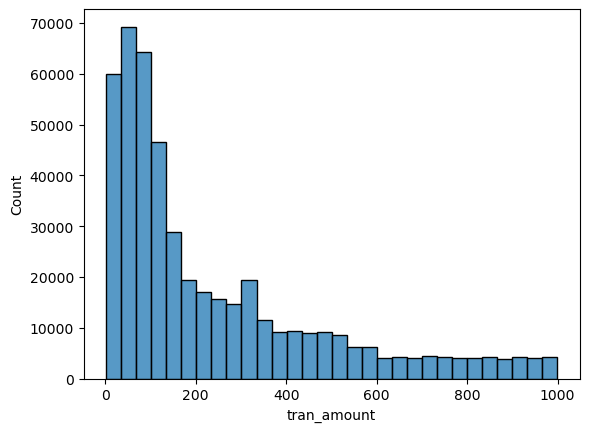

In [392]:
sns.histplot(df_trans[df_trans.tran_amount<10000].tran_amount,bins=30)

In [399]:
q1,q2=df_trans.tran_amount.quantile([0.25,0.75])
IQR=q2-q1
lower=q1-2*IQR
upper=q2+2*IQR
lower,upper

(-596.0, 1059.0)

In [402]:
df_outliers=df_trans[df_trans.tran_amount>=upper]
df_normal=df_trans[df_trans.tran_amount<upper]

In [408]:
mean=df_normal.groupby("product_category")["tran_amount"].mean()
mean

product_category
Beauty & Personal Care     92.167205
Books                      29.553515
Electronics               501.727382
Fashion & Apparel          64.553463
Garden & Outdoor          125.630277
Home Decor                302.487561
Kitchen Appliances        176.773288
Sports                    269.181631
Toys & Games               50.333298
Name: tran_amount, dtype: float64

In [409]:
df_trans.loc[df_outliers.index,"tran_amount"]=df_outliers["product_category"].map(mean)

C:\Users\shikh\AppData\Local\Temp\ipykernel_21204\198416595.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 92.16720517  50.33329759 176.77328782 ... 269.18163136 269.18163136
  64.55346325]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_trans.loc[df_outliers.index,"tran_amount"]=df_outliers["product_category"].map(mean)


In [410]:
df_trans.loc[df_outliers.index]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,92.167205,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,50.333298,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,176.773288,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,64.553463,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,176.773288,Shopify,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499742,499743,868,2023-09-05,64.553463,Meesho,Fashion & Apparel,Gpay
499888,499889,614,2023-09-05,64.553463,Meesho,Fashion & Apparel,Net Banking
499900,499901,811,2023-09-05,269.181631,Flipkart,Sports,Debit Card
499966,499967,662,2023-09-05,269.181631,Meesho,Sports,Gpay


C:\Users\shikh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='tran_amount', ylabel='Count'>

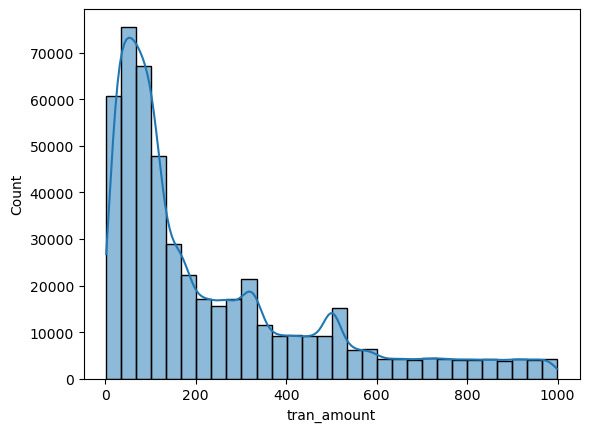

In [412]:
sns.histplot(df_trans.tran_amount,kde=True,bins=30)

In [419]:
df_merge_2=df_cust.merge(df_trans,on="cust_id",how="inner")
df_merge_2.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,tran_id,tran_date,tran_amount,platform,product_category,payment_type
0,1.0,Manya Acharya,Female,32.0,City,Business Owner,358211.0,Married,26-48,1283,2023-01-01,30.0,Shopify,Fashion & Apparel,Net Banking
1,1.0,Manya Acharya,Female,32.0,City,Business Owner,358211.0,Married,26-48,1382,2023-01-01,96.0,Amazon,Sports,Debit Card
2,1.0,Manya Acharya,Female,32.0,City,Business Owner,358211.0,Married,26-48,1521,2023-01-01,86.0,Meesho,Garden & Outdoor,Gpay
3,1.0,Manya Acharya,Female,32.0,City,Business Owner,358211.0,Married,26-48,1576,2023-01-01,149.0,Amazon,Beauty & Personal Care,Phonepe
4,1.0,Manya Acharya,Female,32.0,City,Business Owner,358211.0,Married,26-48,1757,2023-01-01,37.0,Flipkart,Fashion & Apparel,Credit Card


C:\Users\shikh\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\shikh\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


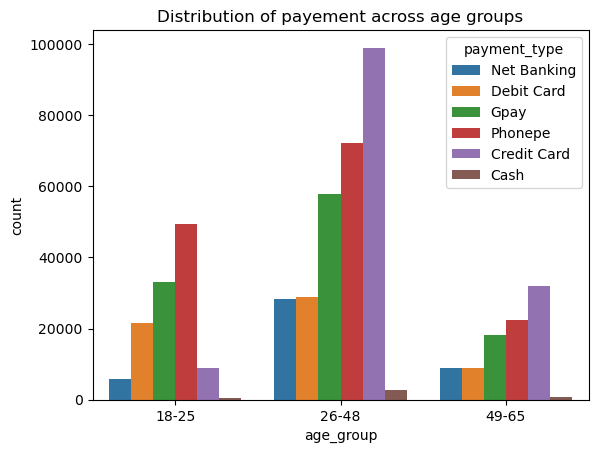

In [427]:
sns.countplot(data=df_merge_2,x="age_group",hue="payment_type")
plt.title("Distribution of payement across age groups")
plt.show()

<Axes: xlabel='payment_type', ylabel='count'>

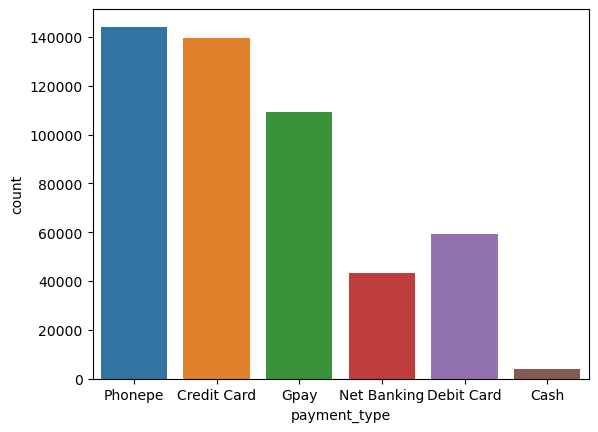

In [426]:
sns.countplot(x=df_trans.payment_type)

C:\Users\shikh\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\shikh\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\shikh\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

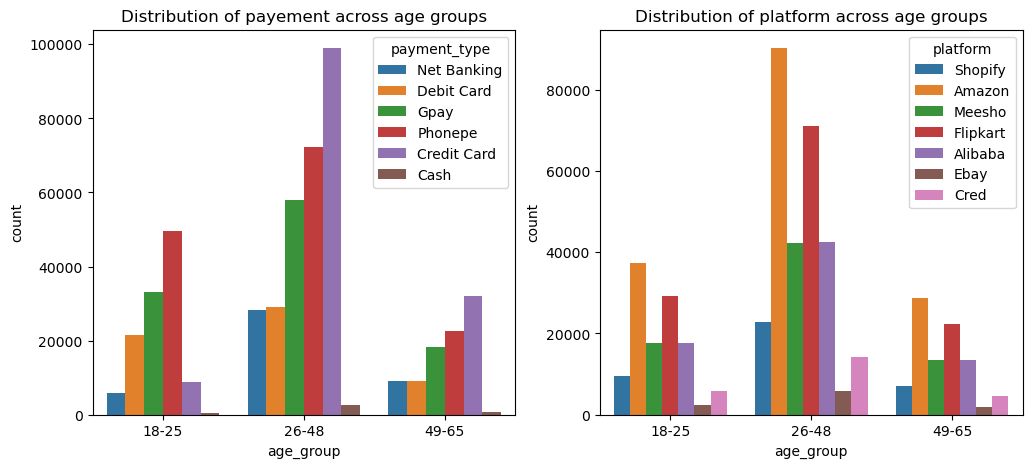

In [440]:
fix,(ax1 ,ax2)=plt.subplots(1,2,figsize=(12,5))
sns.countplot(data=df_merge_2,x="age_group",hue="payment_type",ax=ax1)
ax1.set_title("Distribution of payement across age groups")
sns.countplot(data=df_merge_2,x="age_group",hue="platform",ax=ax2)
ax2.set_title("Distribution of platform across age groups")
plt.show()

In [442]:
//FURTHER ANALYSIS ON AGE GROUP//

SyntaxError: invalid syntax (2071439313.py, line 1)

In [446]:
df_merge_3=df_merge_2.merge(df_ncs,on="cust_id",how="inner")

In [462]:
age_grp_metrics=df_merge_3.groupby("age_group")[["annual_income","credit_limit","credit_score"]].mean().reset_index()
age_grp_metrics

C:\Users\shikh\AppData\Local\Temp\ipykernel_21204\2961698188.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_grp_metrics=df_merge_3.groupby("age_group")[["annual_income","credit_limit","credit_score"]].mean().reset_index()


,age_group,annual_income,credit_limit,credit_score
0,18-25,36374.357756,887.269047,482.430198
1,26-48,144779.100982,20649.074462,598.550992
2,49-65,255910.450875,41819.309471,701.462842


C:\Users\shikh\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\shikh\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\shikh\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

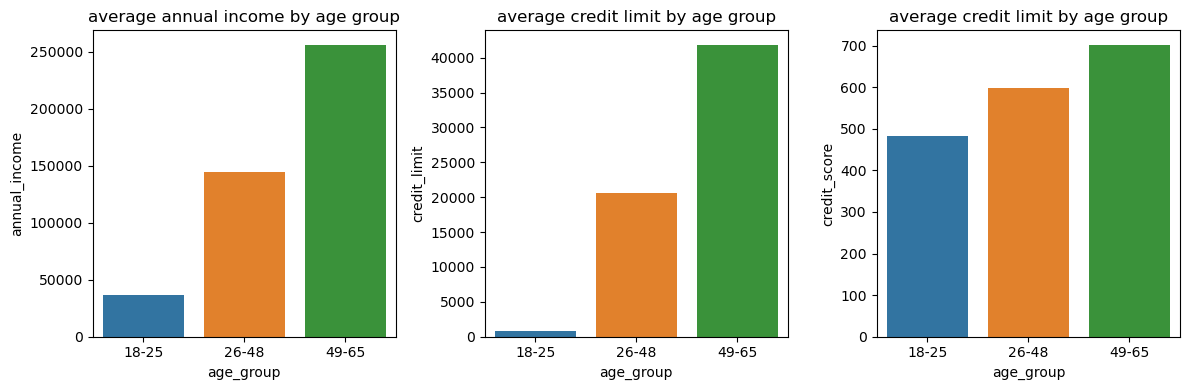

In [463]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(12,4))
sns.barplot(x="age_group",y="annual_income",data=age_grp_metrics,ax=ax1)
ax1.set_title("average annual income by age group")

sns.barplot(x="age_group",y="credit_limit",data=age_grp_metrics,ax=ax2)
ax2.set_title("average credit limit by age group")

sns.barplot(x="age_group",y="credit_score",data=age_grp_metrics,ax=ax3)
ax3.set_title("average credit limit by age group")
plt.tight_layout()